# Reading space-separated files

In one of the radiation lecture, you are asked to read files in `.txt` format in which the header contains metadata, followed by the data in columns, separated by spaces. The file looks like [this](https://github.com/fmaussion/intro_to_programming/blob/master/book/cookbook/SCIA_GSFC_NO2.txt).

Let's read it with pandas.

## Read the metadata

This has to be done in pure python, line by line: 

In [6]:
df_meta = {}
with open('SCIA_GSFC_NO2.txt') as file:
    for i, line in enumerate(file):
        line = line.rstrip()
        print(line)
        if line.startswith('Column'):
            k, v = line.split(':')
            df_meta[k.strip()] = v.strip()
        # Stop after 30 lines
        if i > 30:
            break

SCIAMACHY retrievals of total NO2 vertical column amounts
Pixel footprint overlaps Pandora location GSFC, Lat 38.9926, Long -76.8396
Climatological footprint correction is based on 0.05 grid resolution and the effective Pandora location.
----------------------------------------------------------------
Column 1: UT date and time for center of measurement, yyyymmddThhmmssZ (ISO 8601)
Column 2: Solar zenith angle at the center-time of the measurement in degree
Column 3: Footprint pixel center latitude
Column 4: Footprint pixel center longitude
Column 5: Footprint pixel latitude corner 1
Column 6: Footprint pixel latitude corner 2
Column 7: Footprint pixel latitude corner 3
Column 8: Footprint pixel latitude corner 4
Column 9: Footprint pixel longitude corner 1
Column 10: Footprint pixel longitude corner 2
Column 11: Footprint pixel longitude corner 3
Column 12: Footprint pixel longitude corner 4
Column 13: NO2 vertical column amount [Dobson Units]
Column 14: Uncertainty of NO2 vertical co

In [5]:
df_meta

{'Column 1': ' UT date and time for center of measurement, yyyymmddThhmmssZ (ISO 8601)',
 'Column 2': ' Solar zenith angle at the center-time of the measurement in degree',
 'Column 3': ' Footprint pixel center latitude',
 'Column 4': ' Footprint pixel center longitude',
 'Column 5': ' Footprint pixel latitude corner 1',
 'Column 6': ' Footprint pixel latitude corner 2',
 'Column 7': ' Footprint pixel latitude corner 3',
 'Column 8': ' Footprint pixel latitude corner 4',
 'Column 9': ' Footprint pixel longitude corner 1',
 'Column 10': ' Footprint pixel longitude corner 2',
 'Column 11': ' Footprint pixel longitude corner 3',
 'Column 12': ' Footprint pixel longitude corner 4',
 'Column 13': ' NO2 vertical column amount [Dobson Units]',
 'Column 14': ' Uncertainty of NO2 vertical column amount [Dobson Units]',
 'Column 15': ' Climatological footprint correction of NO2 vertical column amount [Dobson Units]',
 'Column 16': ' Uncertainty climatological footprint correction of NO2 vertical

I think that at this point it would be best to rename the columns to better variable names. Also, the exact line at which the data starts could also be inferred programmatically. This exercise is left to the reader.

## Read the data

In [8]:
import pandas as pd

In [20]:
df = pd.read_csv('SCIA_GSFC_NO2.txt',
                 header=None,  # There is no proper header in the file
                 sep=' ',  # The separator is spaces
                 skiprows=25,  # The first rows are not organized (25 could be fetched automatically)
                 index_col=0,  # The first column is the time index
                 parse_dates=True,  # Parse the time automatically
                )

In [24]:
# Give "nicer" names to columns
df.index.name = 'Time (UTC)'
df.columns = list(df_meta.keys())[1:]

In [22]:
df

,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
Time (UTC),,,,,,,,,,,,,,,,,,,
2009-05-05 15:44:40+00:00,28.4650,39.0214,-76.7878,39.0695,38.8444,39.1940,38.9728,-76.4204,-76.5029,-77.0681,-77.1471,0.15182,0.008298,0.000542,0.000772,0.9796,0.1544,-0.001780,0.003331
2009-05-09 15:19:09+00:00,31.2893,39.0146,-77.0317,39.0811,38.8425,39.1922,38.9447,-76.6278,-76.6920,-77.3865,-77.4505,0.14768,0.007572,0.003367,0.000771,0.1864,0.1912,-0.001604,0.004425
2009-05-09 15:19:10+00:00,31.2880,38.9243,-76.6652,39.3051,39.0468,38.7999,38.5739,-78.1856,-78.2494,-75.2876,-75.3527,0.13956,0.007227,0.012312,0.000768,0.1858,0.7330,-0.001604,0.004425
2009-05-18 15:36:11+00:00,27.0193,38.9538,-76.6282,39.0085,38.7916,39.1146,38.8982,-76.2898,-76.3627,-76.8938,-76.9647,0.23173,0.011801,0.000891,0.000773,0.0000,0.1383,-0.001454,0.003546
2009-05-24 15:47:31+00:00,24.4820,39.0604,-76.7830,39.1051,38.8745,39.2404,39.0153,-76.3954,-76.4825,-77.0766,-77.1595,0.12280,0.007589,0.000861,0.000772,0.2446,0.1665,-0.001375,0.003034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-18 15:36:11+00:00,45.6646,38.8337,-76.5165,39.1740,38.9530,38.7062,38.4945,-77.7083,-77.7721,-75.3132,-75.3815,0.10088,0.009215,0.010842,0.000768,0.5504,0.5484,-0.003730,0.005392
2012-03-23 15:52:37+00:00,41.9500,39.3591,-78.0177,39.7136,39.5019,39.1953,38.9750,-79.1681,-79.2379,-76.7408,-76.8210,0.15875,0.010232,NaN,NaN,0.0000,0.5623,-0.003456,0.004192
2012-03-23 15:52:39+00:00,41.9475,39.0725,-77.1190,39.1203,38.9000,39.2407,39.0243,-76.7593,-76.8395,-77.3939,-77.4707,0.21058,0.010698,0.004900,0.000773,0.0000,0.1478,-0.003456,0.004190


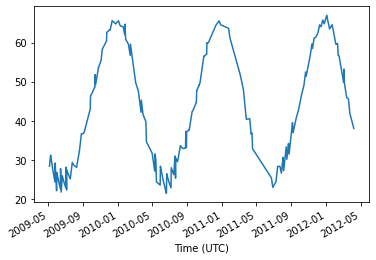

In [23]:
df['Column 2'].plot();